In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [6]:
tran=df.drop(['bpay_biller_code','merchant_id','merchant_code',
               'merchant_long_lat'], axis=1)

In [7]:
tran.shape

(12043, 19)

In [8]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 19 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 non-null object
movement             12043 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(14)
memory 

In [9]:
tran.head()

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit


In [10]:
tran[['long','lat']]=tran['long_lat'].str.split(' ',expand=True)

In [11]:
tran.head()

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,long,lat
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,153.41,-27.95
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,153.41,-27.95
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,151.23,-33.94
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,153.10,-27.66
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,153.41,-27.95


In [12]:
tran.shape

(12043, 21)

In [13]:
tran['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

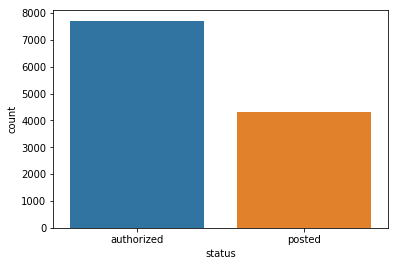

In [14]:
sns.countplot(tran['status'])

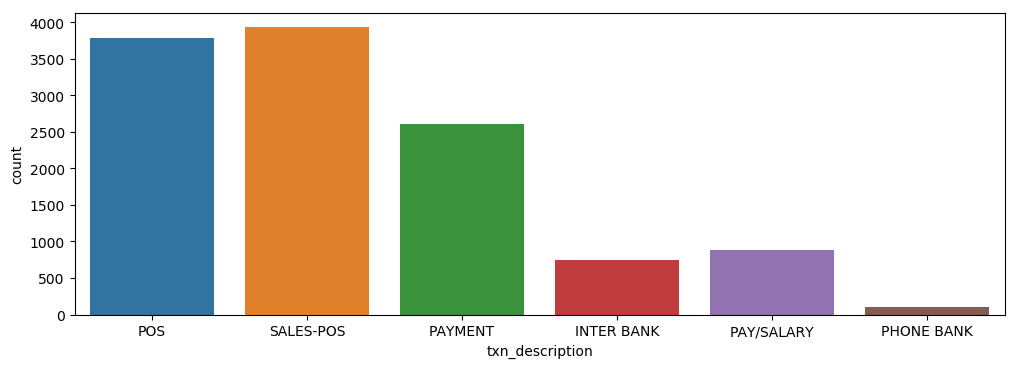

In [15]:
fig = plt.figure(figsize=(12,4),dpi=100)
sns.countplot(tran['txn_description'])

In [16]:
tran['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

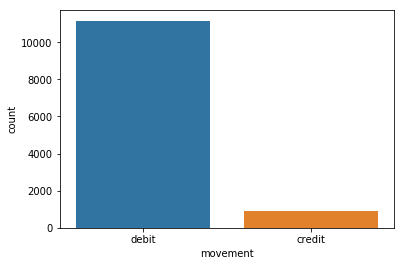

In [17]:
sns.countplot(tran['movement'])

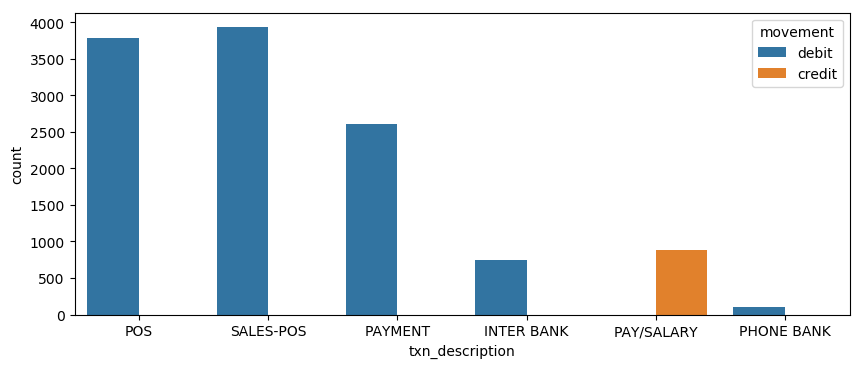

In [18]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.countplot(tran['txn_description'], hue='movement',data=tran)

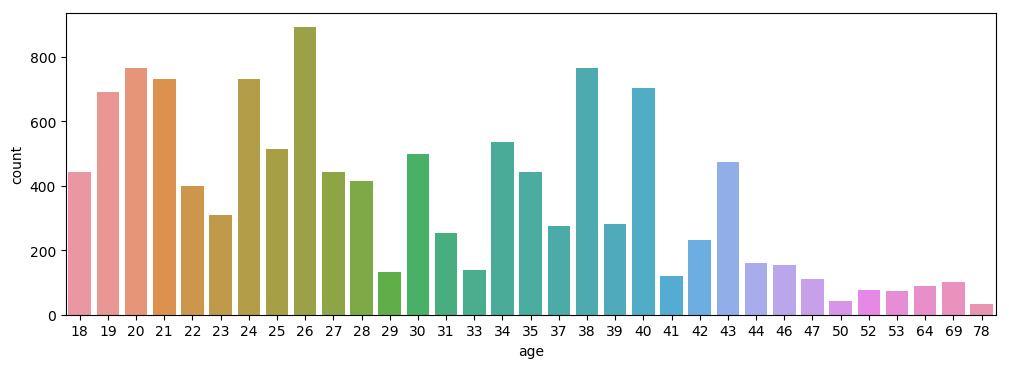

In [19]:
fig = plt.figure(figsize=(12,4),dpi=100)
sns.countplot(x='age',data=tran)

In [20]:
tran['month']=pd.DatetimeIndex(tran['date']).month
tran['day']=pd.DatetimeIndex(tran['date']).day

In [21]:
tran.head()

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,...,extraction,amount,transaction_id,country,customer_id,movement,long,lat,month,day
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,153.41,-27.95,8,1
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,153.41,-27.95,8,1
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,151.23,-33.94,8,1
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,153.10,-27.66,8,1
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,153.41,-27.95,8,1


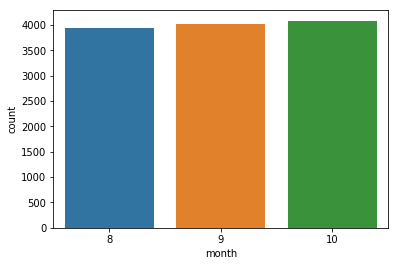

In [22]:
sns.countplot(tran['month'])

Text(0.5,1,'August')

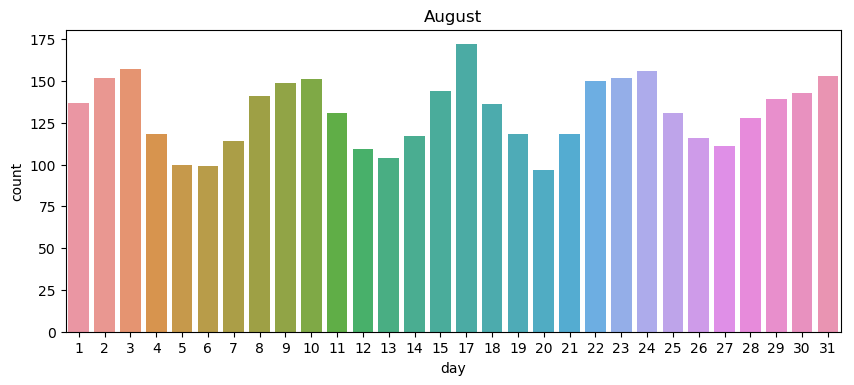

In [23]:
group_monthly=tran.groupby('month')
fig = plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='day',data=group_monthly.get_group(8))
plt.title('August')

Text(0.5,1,'September')

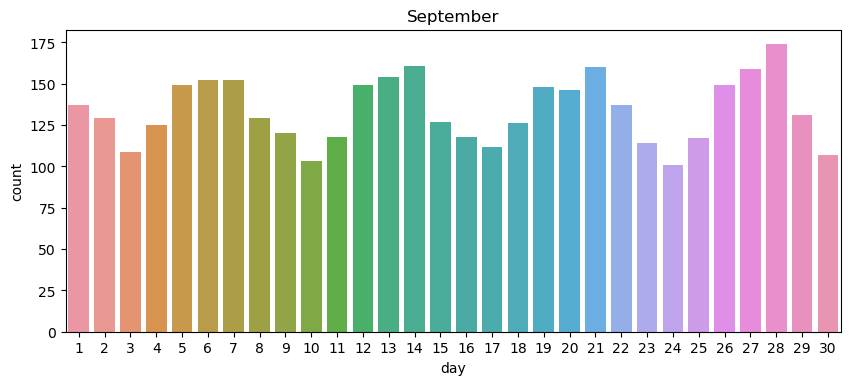

In [24]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='day',data=group_monthly.get_group(9))
plt.title('September')

Text(0.5,1,'October')

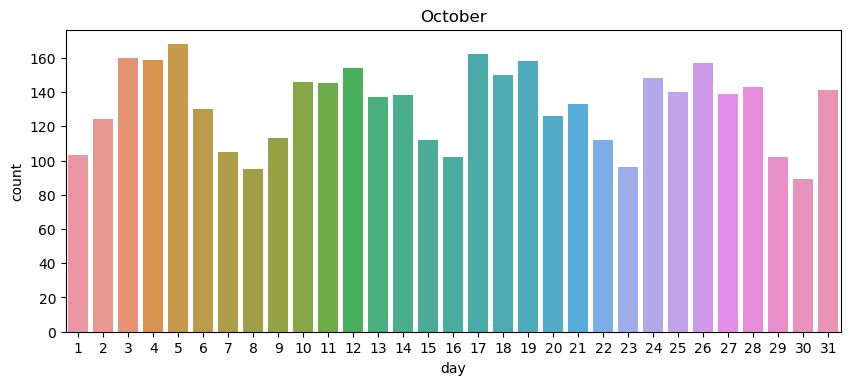

In [25]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='day',data=group_monthly.get_group(10))
plt.title('October')

In [26]:
tran['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [27]:
tran.corr()

,card_present_flag,balance,age,amount,month,day
card_present_flag,1.000000,0.005925,-0.008405,-0.002074,-0.001568,-0.004795
balance,0.005925,1.000000,0.199329,0.059178,0.099208,0.016902
age,-0.008405,0.199329,1.000000,0.029980,0.009923,-0.002528
amount,-0.002074,0.059178,0.029980,1.000000,0.007860,-0.001089
month,-0.001568,0.099208,0.009923,0.007860,1.000000,-0.012437
day,-0.004795,0.016902,-0.002528,-0.001089,-0.012437,1.000000


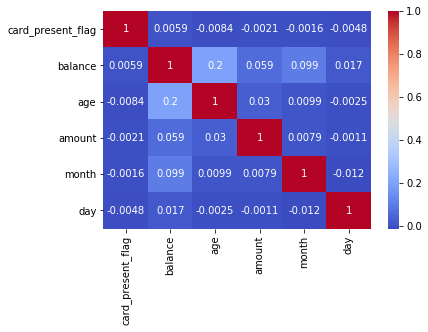

In [28]:
sns.heatmap(tran.corr(),cmap='coolwarm',annot=True)

In [29]:

tran['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [32]:
tran.scatter_matrix()

AttributeError: 'DataFrame' object has no attribute 'scatter_matrix'